**ASSIGNMENT 3**

Original Images:


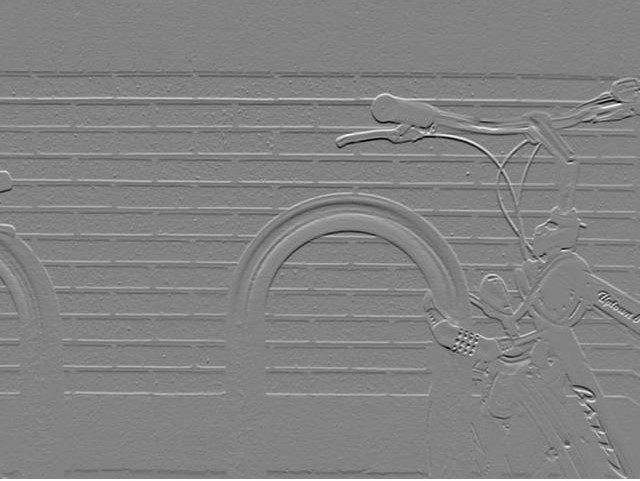

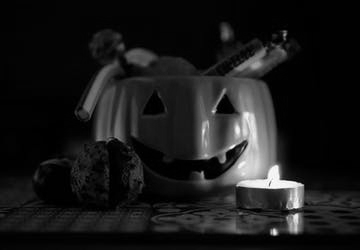

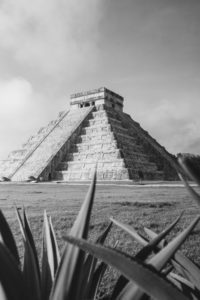

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
images = ['1.jpeg', '2.jpeg', '3.jpeg']
print("Original Images:")
for img in images:
 imge = cv2.imread(img, 0)
 cv2_imshow(imge)

**CANNY EDGE DETECTION**

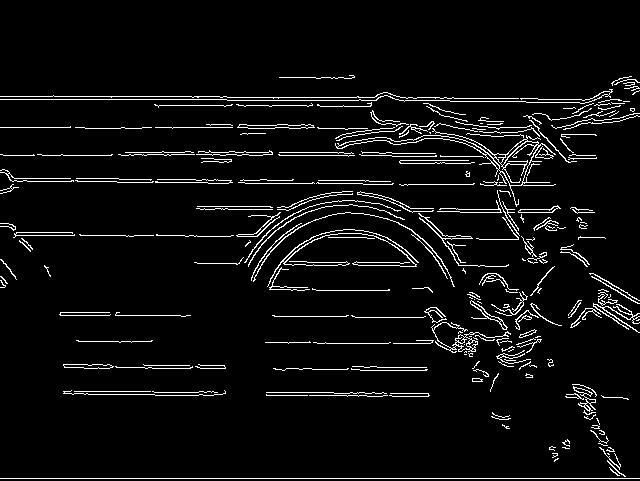

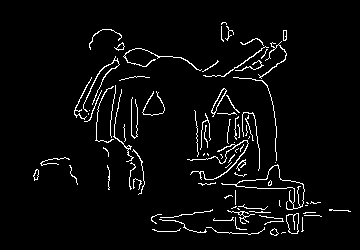

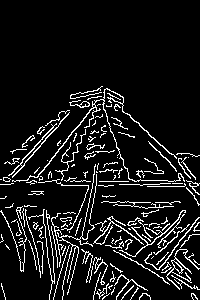

In [47]:
for img in images:
 img = cv2.imread(img)
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 blur = cv2.GaussianBlur(gray, (5, 5), 0)
 sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
 sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)
 gradient = np.sqrt(sobelx**2 + sobely**2)
 edges = np.zeros_like(gradient)
 for i in range(1, edges.shape[0]-1):
     for j in range(1, edges.shape[1]-1):
         if gradient[i, j] == np.max((gradient[i-1:i+2, j-1:j+2])):
             edges[i, j] = gradient[i, j]
 low_threshold = 50
 high_threshold = 100
 weak_edges = edges < high_threshold
 strong_edges = edges >= high_threshold
 edges = cv2.Canny(blur, low_threshold, high_threshold)
 cv2_imshow(edges)


**HOUGH TRANSFORM**

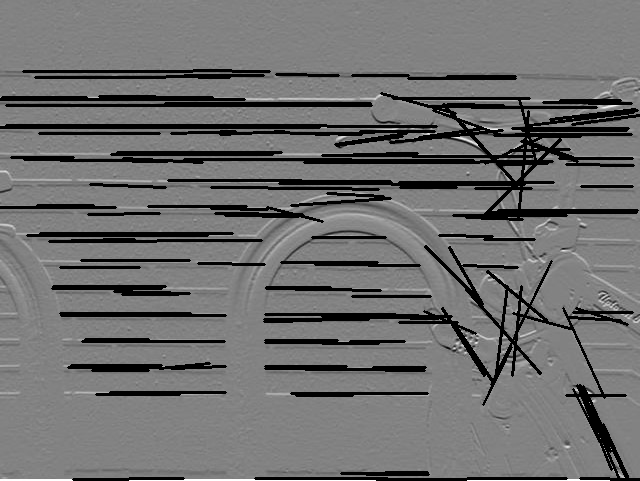

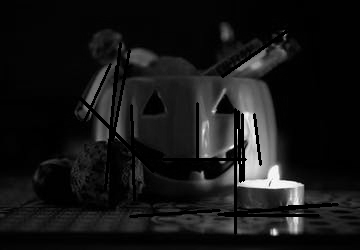

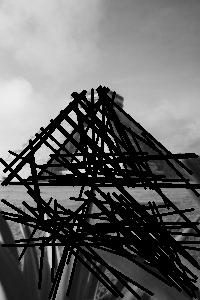

In [38]:
for image in images:
 img = cv2.imread(image, 0)
 edges = cv2.Canny(img, 50, 150, apertureSize=3)
 rho = 1  # Distance resolution in pixels
 theta = np.pi / 180  # Angle resolution in radians
 threshold = 50  # Minimum number of votes for a line
 min_line_length = 50  # Minimum line length
 max_line_gap = 10  # Maximum gap between points on a line
 lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), minLineLength=min_line_length, maxLineGap=max_line_gap)
 if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
 else:
    print("No lines detected!")
 cv2_imshow(img)



**LAPLACIAN**


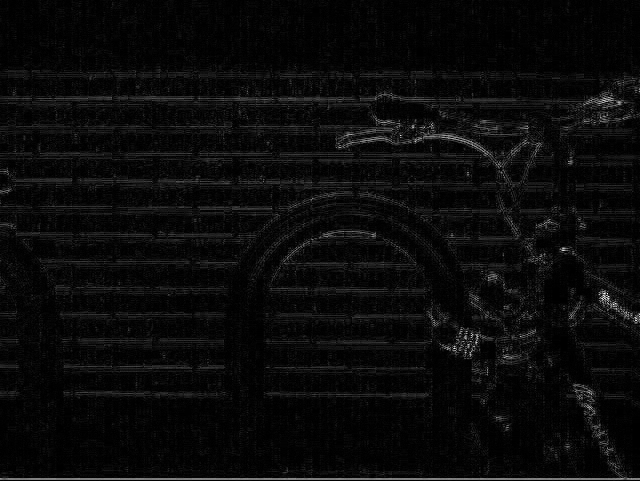

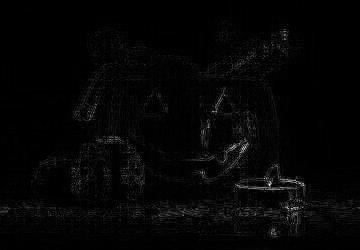

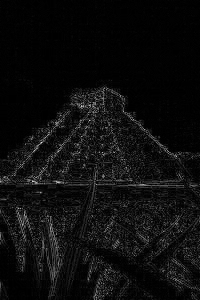

In [44]:
for image in images:
 img = cv2.imread(image, 0)
 laplacian = cv2.Laplacian(img, cv2.CV_64F)
 edges = cv2.convertScaleAbs(laplacian)
 cv2_imshow(edges)


**EDGE DETECTION USING GRADIENTS-SOBEL,PREWITT,ROBERT OPERATORS**

Sobel Operator:


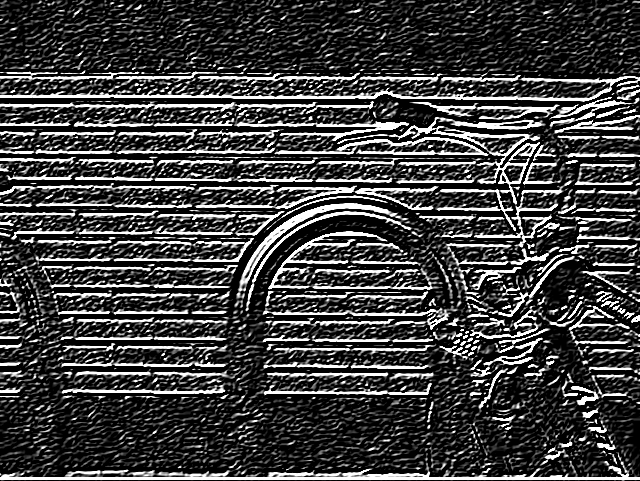

Prewitt Operator:


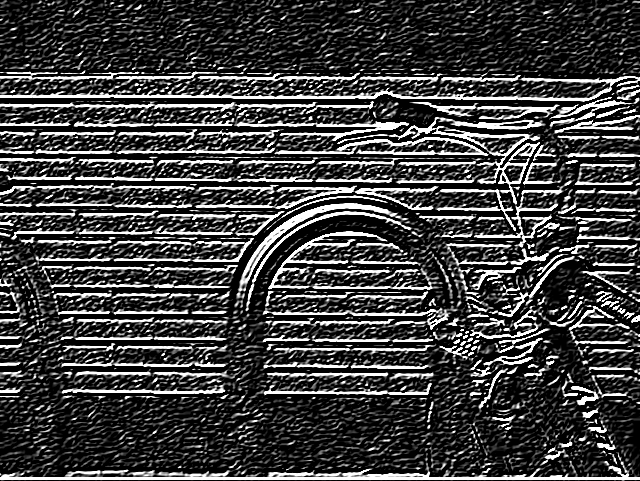

Robert Operator:


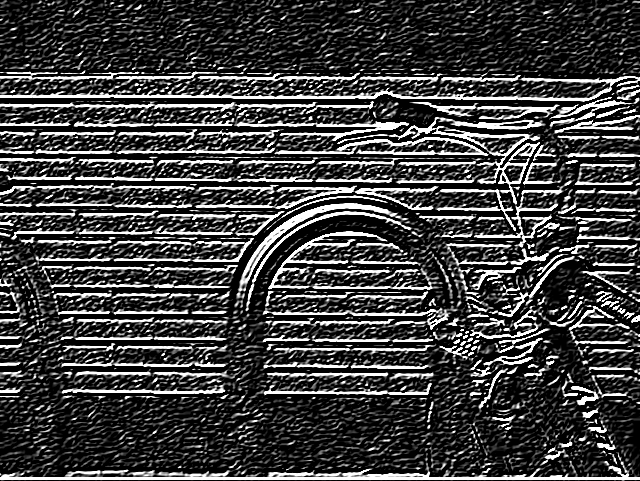

Sobel Operator:


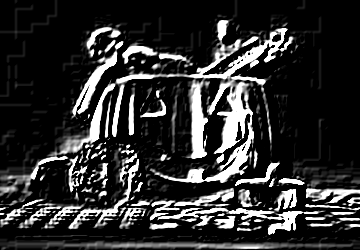

Prewitt Operator:


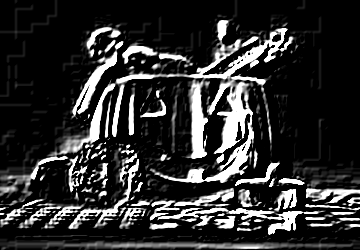

Robert Operator:


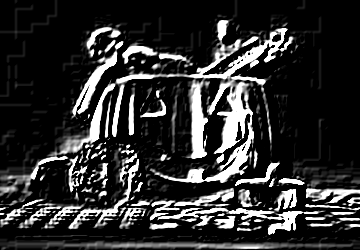

Sobel Operator:


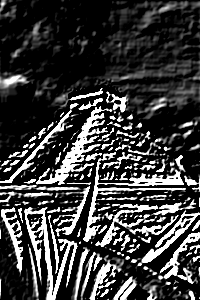

Prewitt Operator:


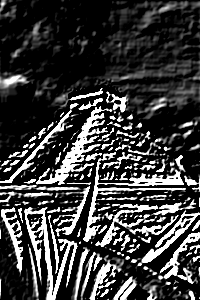

Robert Operator:


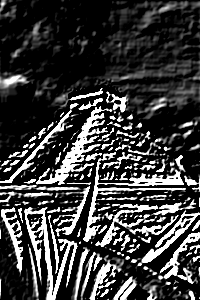

In [42]:
for image in images:
 img = cv2.imread(image, 0)
 # Sobel operator
 sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
 sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
 sobel_edges = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
 # Prewitt operator
 prewittx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
 prewitty = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
 prewitt_edges = cv2.addWeighted(prewittx, 0.5, prewitty, 0.5, 0)
 # Robert operator
 robert_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
 robert_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
 robert_edges = cv2.addWeighted(robert_x, 0.5, robert_y, 0.5, 0)
 print("Sobel Operator:")
 cv2_imshow(sobel_edges)
 print("Prewitt Operator:")
 cv2_imshow(prewitt_edges)
 print("Robert Operator:")
 cv2_imshow(robert_edges)

**Canny:** It is often considered the best overall edge detector for its balance of accuracy, sensitivity, and noise tolerance.
**Hough Transform:** It is excellent for detecting straight lines, even in noisy images.
**Laplacian:** It is sensitive to noise, but can be effective for detecting sharp edges.
**Gradient-Based Methods:** It is simple and efficient, but less accurate than Canny, especially in noisy images.

**CANNY GIVES BEST RESULTS**